<a href="https://colab.research.google.com/github/KlippL/Doctors_Reviews_NLP/blob/master/Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Makes a Good Doctor ?

## Text Analysis of Doctor Reviews Using Fisher's Discriminant, LDA and Word Embedding

Patients are increasingly turning to patient review sites when looking for new doctors. While patient reviews might not reflect the full range of experiences that a doctor provides, it is important for doctors to know what experiences patients cite when giving either good or bad reviews. 



---


Contributors: Sonal Agrawal, Jingyao Kang, Laura Klipp, Rahul Panicker

#### Background and Data Collection

Patient reviews were scraped from the two most frequently studied patient review websites, Ratemds.com and Healthgrades.com. Data was scraped for multiple specialties in various cities around the United States. 


```

```

Reviews were scraped for the following 6 specialties:
1. Family Doctors / General Practitioners
2. Internal Medicine
3. General Surgery
4. Cardiology
5. OBGYN
6. Pediatrics

Reviews were scraped in the following 5 cities:
1. Los Angeles
2. Houston
3. Atlanta
4. Detroit
5. Seattle

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np   
import nltk 
import string
import os
import gensim
from gensim import corpora
import pyLDAvis.gensim

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings("ignore")                                   #Ignoring unnecessory warnings

import matplotlib.pyplot as pyplot
from wordcloud import WordCloud
from nltk.corpus import stopwords                                   #Stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer                                 # Stemmer
from nltk.stem import WordNetLemmatizer                             # Lemmatizer
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import Data Sets

* Import all scrapes from each specialty and combine them 
* Only keep the star rating from the review and the review
* Subset the data only for the good reviews (4 stars and above) and the bad reviews (3 stars and below)
* Make a dummy column of the good and bad reviews
* Make two new df of good and bad reviews

In [0]:
# Cardiologists
dfCard1 = pd.read_csv("https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Hou.csv", index_col =0)
dfCard2 = pd.read_csv("https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_LA.csv", index_col =0)
dfCard3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Atl.csv', index_col =0)
dfCard4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Sea.csv', index_col =0)
dfCard5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Det.csv', index_col =0)
dfCard6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Cardiologist_Hou.csv', sep = '\t')

# Family General Practitioners
dfGP1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Atl.csv', index_col =0)
dfGP2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Hou.csv', index_col =0)
dfGP3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_LA.csv', index_col =0)
dfGP4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Sea.csv', index_col =0)
dfGP5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Det.csv', index_col =0)
dfGP6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Family_GP_Hou.csv', sep = '\t')

# Internal Medicine
dfInt1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Atl.csv', index_col =0)
dfInt2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Hou.csv', index_col =0)
dfInt3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_LA.csv', index_col =0)
dfInt4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Sea.csv', index_col =0)
dfInt5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Det.csv', index_col =0)
dfInt6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Intern_Hou.csv', sep = '\t')

# Pediatrics
dfPed1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Atl.csv', index_col =0)
dfPed2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Hou.csv', index_col =0)
dfPed3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_LA.csv', index_col =0)
dfPed4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Sea.csv', index_col =0)
dfPed5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Det.csv', index_col =0)
dfPed6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Ped_Hou.csv', sep = '\t')

# General Surgery
dfSurg1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Atl.csv', index_col =0)
dfSurg2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Hou.csv', index_col =0)
dfSurg3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_LA.csv', index_col =0)
dfSurg4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Sea.csv', index_col =0)
dfSurg5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Det.csv', index_col =0)
dfSurg6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Surgery_Hou.csv', sep = '\t')

# OBGYN
dfOB1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Atl.csv', index_col =0)
dfOB2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Hou.csv', index_col =0)
dfOB3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_LA.csv', index_col =0)
dfOB4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Sea.csv', index_col =0)
dfOB5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Det.csv', index_col =0)
dfOB6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_OBGYN_Hou.csv', sep = '\t')

In [3]:
df_cardio = pd.concat([dfCard1, dfCard2, dfCard3, dfCard4, dfCard5, dfCard6],ignore_index=True, sort=True)
df_gp = pd.concat([dfGP1, dfGP2, dfGP3, dfGP4, dfGP5, dfGP6],ignore_index=True, sort=True)
df_intern = pd.concat([dfInt1, dfInt2, dfInt3, dfInt4, dfInt5, dfInt6],ignore_index=True, sort=True)
df_ped = pd.concat([dfPed1, dfPed2, dfPed3, dfPed4, dfPed5, dfPed6],ignore_index=True, sort=True)
df_surg = pd.concat([dfSurg1, dfSurg2, dfSurg3, dfSurg4, dfSurg5, dfSurg6],ignore_index=True, sort=True)
df_ob = pd.concat([dfOB1, dfOB2, dfOB3, dfOB4, dfOB5, dfOB6],ignore_index=True, sort=True)

df_all = pd.concat([df_cardio, df_gp, df_intern, df_ped, df_surg, df_ob], ignore_index=True, sort=True)

df_all = df_all[df_all.review.notnull()]
df_all = df_all[df_all.review != "None"]

print (len(df_all))

df_all.head()

17635


,Unnamed: 0,city,doctor_name,gender,helpfullness_rating,helpfulness_rating,individual_rating,knowledge_rating,overall_rating,review,review_count,review_date,scheduling_rating,specialty,staff_rating,state,wait_time,wait_time_rating
0,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,I was assigned Dr Attar in the Methodist ER. H...,21,2017-12-15T00:55:45.983Z,NaN,cardiologist,5,Texas,NaN,5.0
1,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,His kindness and caring gave me the sense that...,21,2016-08-30T05:07:29.955Z,NaN,Cardiologist,5,Texas,NaN,5.0
2,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,He was my cardiologist when I used to live in ...,21,2016-06-19T09:41:34.719Z,NaN,Cardiologist,5,Texas,NaN,5.0
3,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,"Dr.Attar is the best Dr anywhere, i love him t...",21,2016-03-30T02:20:23.272Z,NaN,Cardiologist,5,Texas,NaN,5.0
4,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,The doctor who was sent to us from god. He is ...,21,2014-09-10T00:46:59.381Z,NaN,Cardiologist,5,Texas,NaN,5.0


In [4]:
# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_all = df_all[['individual_rating', 'review']]
df_all.individual_rating = df_all.individual_rating.astype(float)
df_all = df_all[(df_all.individual_rating >= 4) | (df_all.individual_rating < 3)]

# Make a separate df of good reviews and bad reviews
df_good = df_all[(df_all.individual_rating >= 4)]
df_bad = df_all[(df_all.individual_rating < 3)]

# Make a dummy column in df_all for if a review is good or bad
df_all['is_good'] = (df_all.individual_rating >= 4) * 1 + (df_all.individual_rating < 3) * 0

print("Number of good reviews: ")  
(df_all['is_good'] == 1).sum()
print(' ')
print(" Number of bad reviews:") 
(df_all['is_good'] == 0).sum()

Number of good reviews: 


12135

 
 Number of bad reviews:


4526

In [5]:
random_sub = df_all.sample(n=12500)
random_sub.head()

print("Number of good reviews: ")  
(random_sub['is_good'] == 1).sum()
print(' ')
print(" Number of bad reviews:") 
(random_sub['is_good'] == 0).sum()

,individual_rating,review,is_good
7537,2.8,"I saw Dr Meyer 1 time, her partner 1 time, and...",0
933,5.0,"Very good doctor, excellent in his explanation...",1
4567,2.0,Dr. Mario Ravry Jr is a wonderful Doctor. He i...,0
1114,5.0,spectacular doctor. saved my life,1
12075,2.3,He is to cocky and thinks he knows it all. Alw...,0


Number of good reviews: 


9115

 
 Number of bad reviews:


3385

### Define Cleaning Functions

In [0]:
# Remove Punctuation
def removePuncStr(s):
    for c in string.punctuation:
        s = s.replace(c,"")
    return s

def removePunc(text_array):
    nopunc = []
    for h in text_array:
        try:
            nopunc.append(removePuncStr(h))
        except:
            nopunc.append(h)
    return nopunc

# Remove Numbers
def removeNumbersStr(s):
    for c in range(10):
        n = str(c)
        s = s.replace(n," ")
    return s

def removeNumbers(text_array):
    nonum = []
    for n in text_array:
        try:
            nonum.append(removeNumbersStr(n))
        except:
            nonum.append(i)
    return nonum

# Remove Stopwords
def stopText(text_array):
    stop_words = set(stopwords.words('english'))
    stopped_text = []
    for h in text_array:
        try:
            words = word_tokenize(h)
            h2 = ''
            for w in words:
                if w not in stop_words:
                    h2 = h2 + ' ' + w
            stopped_text.append(h2)
        except:
            stopped_text.append(h)
    return stopped_text


# Lemmentization
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

def lemmText(text_array):
    WNlemmatizer = WordNetLemmatizer()
    lemmatized_text = []
    for h in text_array:
        try:
            words = word_tokenize(h) 
            h2 = ''
            for w in words:
                h2 = h2 + ' ' + WNlemmatizer.lemmatize(w,pos="v")
            lemmatized_text.append(h2)
        except:
            lemmatized_text.append(h)
    return lemmatized_text

# Removing other words that don't impact reviews
def stopOther(text_array):
    stop_words = set(['as','dr', 'doctor', 'doctors', 'he_is', 'said', 'told', 'did_not', 'another', 'didnt', \
                      'and_then', 'to_be','would', 'get', 'go', 'even', 'takes', 'at_all', 'doesnt', 'is_not', \
                      'about_it', 'about', 'across', 'act', 'acts', 'two', 'back', 'dont', 'patient', 'office', \
                      'of_the', 'in_the', 'one', 'also', 'have_been', 'always', 'he_has', 'like', 'see', 'and_his', \
                      'of_my', 'one_of', 'is_the', 'going', 'first', 'is_very', 'anyone', 'could', 'really', 'him_to'\
                      'to_the', 'and_he', 'has_been', 'in_his', 'to_see', 'went', 'for_the', 'in_my', 'she_is', \
                      'if_you', 'way', 'many', 'hes', 'since', 'to_me', 'and_the', 'that_he', 'is_an', 'me_and', \
                      'ive', 'say', 'man', 'him_and', 'with_my', 'to_him', 'of_his', 'and_was', 'on_the', 'with_the', \
                      'with_me', 'with_his', 'second', 'much', 'of_dr', 'im', 'to_have', 'and_my', 'at_the', 'as_well', \
                      'done', 'for_my', 'to_my', 'was_very', 'the_doctor', 'me_to', 'and_very', 'it_is', 'and_have', \
                      'ago', 'to_get', 'houston', 'sure', 'you_are', 'the_most', 'for_his', 'to_dr', 'and_has', \
                      'would_not', 'saw', 'doctor_he', 'it_was', 'had_to', 'is_one', 'going_to', 'for_over', 'that_was', \
                      'thorough_and', 'us', 'able_to', 'out_of', 'he_says', 'will', 'he_was', 'ever', 'him_to', \
                      'to_the', 'make', 'took', 'made', 'he_is_very', 'care_of', 'with_dr', 'things', 'go_to', 'came', \
                      'without', 'see_him', 'been_my', 'every', 'about_his', 'is_one_of', 'to_his', 'put', 'to_make', \
                      'for_me', 'have_to', 'may', 'all_of', 'and_is', 'with_him', 'would_have', 'to_take', 'to_you', \
                      'he_is_the', 'does_not', 'with_you', 'he_did', 'him_for', 'all_the', 'have_had', 'his_time', \
                      'you_have', 'want', 'what_is', 'seems', 'doctor_is', 'and_they', 'lot', 'to_go', 'went_to', \
                      'not_be', 'from_the', 'was_in', 'to_do', 'three', 'but_he', 'one_of_the', 'several', 'for_him', \
                      'and_takes', 'takes_the', 'is_one_of_the', 'he_will', 'actually', 'not_only', 'she_was', \
                      'he_takes', 'md', 'he_is_more', 'who_is', 'was_not', 'he_should', 'he_sent', 'he_was_more', \
                      'health_the', 'heard_of', 'he_was_so', 'he_was_our', 'he_was_on', 'he_put_in', 'he_is_now', \
                      'he_is_part', 'he_is_really', 'he_is_just', 'he_is_in', 'he_only', 'he_not_only', 'he_needed_to', \
                      'he_may', 'he_just', 'he_knew_the', 'he_worked', 'he_works', 'he_wrote', 'head_now', \
                      'he_is_one_the', 'he_is_now_my', 'he_is_in_this', 'he_is_able_to', 'he_is_able_to_do', \
                      'he_is_able', 'he_is_doing_and', 'he_needed', 'he_only_has', 'year', 'years', 'got', 'to_this',\
                      'do_not', 'and_had', 'me_that', 'this_is', 'at_me', 'of_this', 'the_is', 'to_come', 'wont', \
                      'this_was', 'she_had', 'to_to', 'that_had', 'then_she', 'in_for', 'me_for', 'is_of', 'for_an', \
                      'and_when', 'with_this', 'she_is_very', 'because_of', 'am_not', 'and_did_not', 'she_and_her', \
                      'this_and', 'him_again_and', 'her_very', 'take_those', 'on_all', 'them_not', 'at_the_same',\
                      'you_from', 'you_out_of', 'and_sometimes', 'when_he_was', 'that_in', 'but_we', 'with_our', \
                      'each_other', 'for_in', 'and_he_is_the', 'he_give', 'and_over', 'only_is', 'when_there', \
                      'have_in', 'have_he', 'that_have_been', 'has_an', 'there_he', 'but_what', 'who_have', 'yr', \
                      'there_is', 'out_of_his', 'him_when', 'in_addition', 'and_he_was', 'before_he', 'no_matter', \
                      'her_with', 'be_my', 'he_is_doing', 'tx', 'for_yrs', 'can_be', 'any_other', 'with_your', \
                      'rest_of', 'know_he', 'that_know', 'with_any', 'few_and',  'me_and_was', 'did_my', 'but_she_is', \
                      'think_the', 'and_know', 'they_take', 'yrs_and', 'for_their', 'for_being', 'with_her', 'she_has', \
                      'medical', 'never', 'pysician', 'now', 'day', 'seen', 'cardiologist', 'need', 'tell', 'work', \
                      'patients', 'to_how', 'lots', 'what_should', 'and_not', 'you_to', 'on_my', 'was_the', 'she_did',\
                      'that_the', 'had_no', 'to_her', 'and_she', 'shes', 'her_to', 'and_her', 'that_she', 'they_are', 'her_she', \
                      'not_to', 'and_that', 'for_and', 'in_her', 'more_than', 'her_for', "\'"
                     ])
    stopped_text = []
    for h in text_array:
        try:
            words = word_tokenize(h)
            h2 = ''
            for w in words:
                if w not in stop_words:
                    h2 = h2 + ' ' + w
            stopped_text.append(h2)
        except:
            stopped_text.append(h)
    return stopped_text

### Find differences in words that are used in good and bad reviews

Generating word clouds for total reviews, good reviews, and bad reviews shows differences in....

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

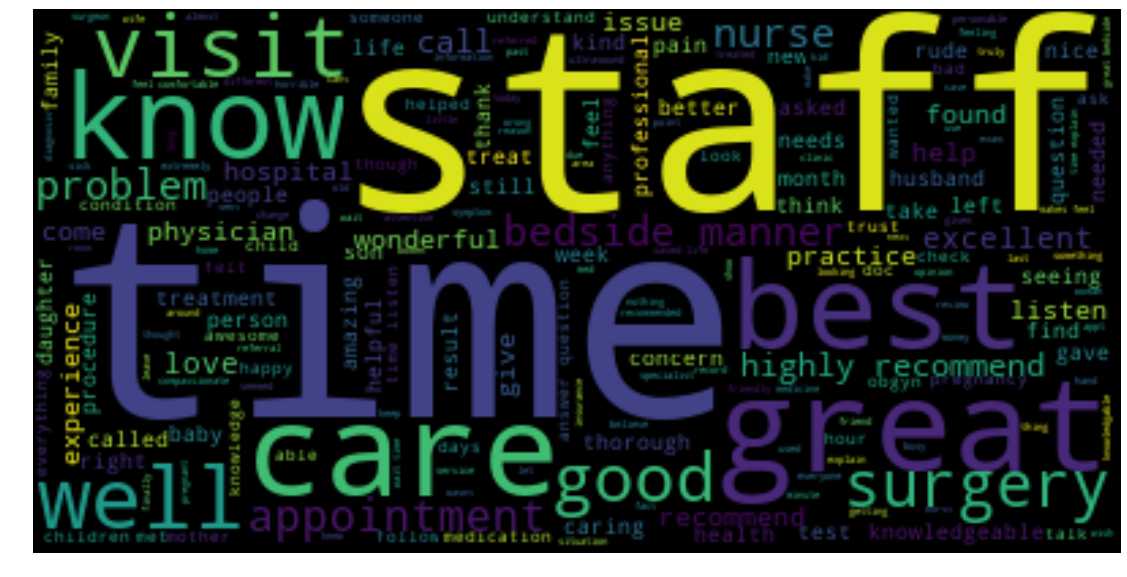

In [7]:
# Clean all reviews 
reviews_all = df_all.review.str.lower()
reviews_all = removePunc(reviews_all)
reviews_all = removeNumbers(reviews_all)
reviews_all = stopOther(reviews_all)


# Word Cloud for all reviews
wordcloud = WordCloud().generate(pd.Series(reviews_all).str.cat(sep = " "))

pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

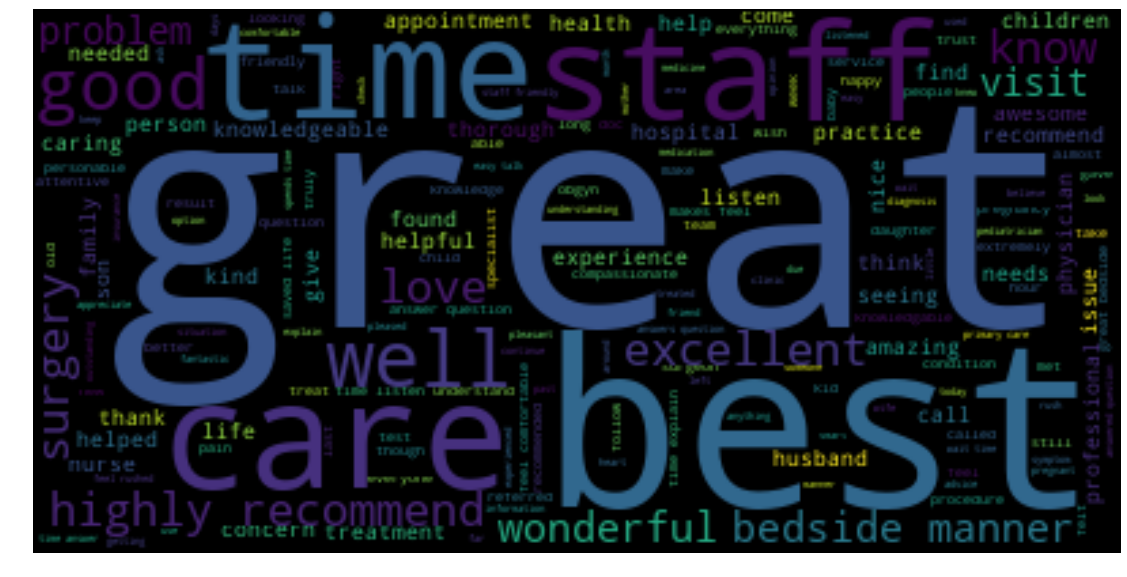

In [8]:
# Clean good reviews
reviews_good = df_good.review.str.lower()
reviews_good = removePunc(reviews_good)
reviews_good = removeNumbers(reviews_good)
reviews_good = stopOther(reviews_good)
wordcloud = WordCloud().generate(pd.Series(reviews_good).str.cat(sep = " "))

# Word Cloud for good reviews
pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

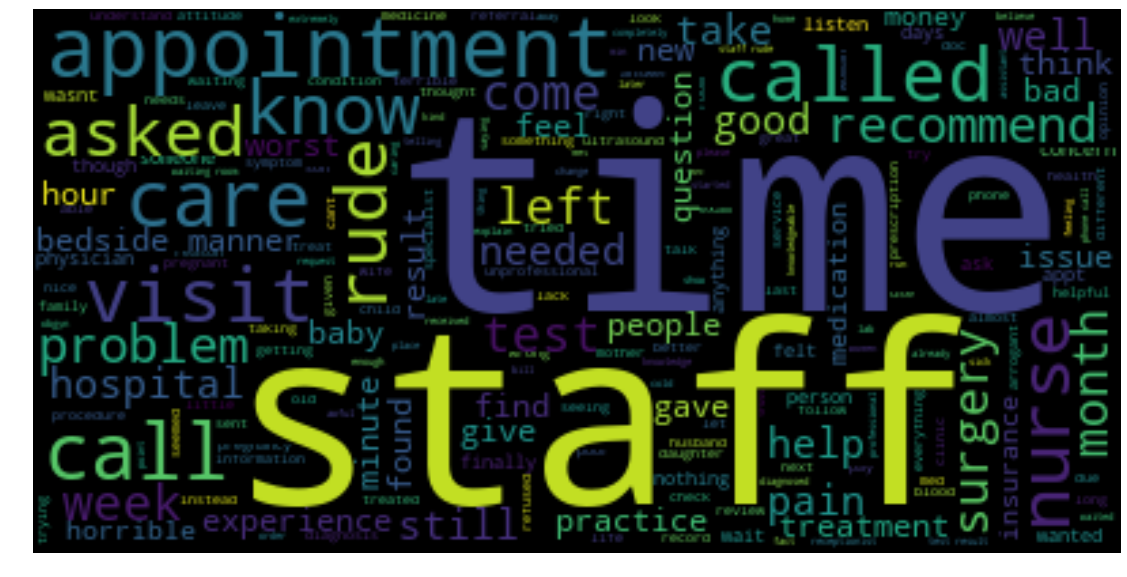

In [9]:
# Clean bad reviews
reviews_bad = df_bad.review.str.lower()
reviews_bad = removePunc(reviews_bad)
reviews_bad = removeNumbers(reviews_bad)
reviews_bad = stopOther(reviews_bad)

# Word Cloud for bad reviews
wordcloud = WordCloud().generate(pd.Series(reviews_bad).str.cat(sep = " "))

pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

## Text Analysis

In [0]:
reviews_sub = random_sub.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X = vec.fit_transform(reviews_sub)

In [11]:
dtm = pd.DataFrame(X.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm = dtm.T
print(tdm.shape)

(18286, 12500)


### Calculate Fisher's Discriminant Score

In [12]:
len(dtm)

12500

In [13]:
mask = pd.DataFrame(random_sub.is_good)
good_df = dtm.iloc[np.any(mask.values,axis=1),]
bad_df = dtm.iloc[~np.any(mask.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df) + len(good_df))/len(dtm)

1.0

In [14]:
FiDi = pd.DataFrame(((good_df.mean() - bad_df.mean())**2)/(np.std(good_df)**2 + np.std(bad_df)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words = FiDi.term.tolist()
words = stopText(words)
words = stopOther(words)

words = pd.Series(words).str.lstrip(" ").tolist()

FiDi = FiDi[FiDi.term.isin(words)].sort_values(by = 'FiDi_score', ascending = False)
FiDi.head(25)

,term,FiDi_score
12474,rude,0.173011
2483,best,0.133174
14239,the_best,0.129131
5896,great,0.128067
3041,caring,0.100120
4727,excellent,0.093908
17861,worst,0.092522
7172,highly,0.091411
7178,highly_recommend,0.074737
8688,knowledgeable,0.073772


### Create DF of most Frequent Words

In [15]:
tdm['total'] = tdm.sum(axis =1)
freq = tdm.reset_index().rename(columns = {"level_0":"allwords"})

words2 = freq.allwords.tolist()
words2 = stopText(words2)
words2 = stopOther(words2)

words2 = pd.Series(words2).str.lstrip(" ").tolist()

freq = freq[freq.allwords.isin(words2)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq.head(25)

,allwords,total
15137,time,3954
13502,staff,3214
5896,great,2358
2942,care,2282
12162,recommend,2032
2483,best,2013
14239,the_best,1586
5831,good,1526
3041,caring,1486
12007,questions,1437


### Most frequent phrases

In [16]:
freq['under_count'] = freq.allwords.str.count('_')
freq[freq.under_count>=3].head(25)

,allwords,total,under_count
13881,takes_the_time_to,229,3
11081,one_of_the_best,176,3
6654,he_is_the_best,171,3
8263,is_the_best_doctor,153,3
16006,took_the_time_to,139,3
6296,have_been_going_to,138,3
2375,been_patient_of_dr,137,3
6309,have_been_patient_of,129,3
3024,cares_about_his_patients,122,3
12190,recommend_him_to_anyone,120,3


## Topic Analysis Using LDA

### Topic Analysis for Overall Reviews

In [0]:
# Topic Analysis for all reviews
rvws_all = stopText(reviews_all)
clean_rvws_all = [i.split() for i in rvws_all]

# Creating the term dictionary of our reviews, where every unique term is assigned an index. 
dictionary_all = corpora.Dictionary(clean_rvws_all)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_all = [dictionary_all.doc2bow(doc) for doc in clean_rvws_all]

In [18]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel_all = Lda(doc_term_matrix_all, num_topics=5, id2word = dictionary_all, passes=50)

#Results
print(ldamodel_all.print_topics(num_topics=5, num_words=7))

[(0, '0.022*"great" + 0.019*"staff" + 0.018*"time" + 0.018*"best" + 0.017*"recommend" + 0.016*"care" + 0.014*"caring"'), (1, '0.031*"time" + 0.020*"wait" + 0.016*"baby" + 0.011*"long" + 0.010*"appointment" + 0.010*"good" + 0.009*"room"'), (2, '0.009*"staff" + 0.007*"called" + 0.007*"call" + 0.007*"rude" + 0.006*"appointment" + 0.006*"care" + 0.005*"results"'), (3, '0.009*"sense" + 0.008*"respect" + 0.007*"humor" + 0.006*"staff" + 0.005*"texas" + 0.004*"u" + 0.004*"gyn"'), (4, '0.044*"surgery" + 0.018*"life" + 0.014*"surgeon" + 0.008*"pain" + 0.008*"saved" + 0.007*"performed" + 0.007*"hospital"')]


<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 0')

[Text(0, 0, 'great'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'time'),
 Text(0, 0, 'best'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'care'),
 Text(0, 0, 'caring'),
 Text(0, 0, 'knowledgeable'),
 Text(0, 0, 'feel'),
 Text(0, 0, 'questions')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 1')

[Text(0, 0, 'time'),
 Text(0, 0, 'wait'),
 Text(0, 0, 'baby'),
 Text(0, 0, 'long'),
 Text(0, 0, 'appointment'),
 Text(0, 0, 'good'),
 Text(0, 0, 'room'),
 Text(0, 0, 'waiting'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'minutes')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 2')

[Text(0, 0, 'staff'),
 Text(0, 0, 'called'),
 Text(0, 0, 'call'),
 Text(0, 0, 'rude'),
 Text(0, 0, 'appointment'),
 Text(0, 0, 'care'),
 Text(0, 0, 'results'),
 Text(0, 0, 'insurance'),
 Text(0, 0, 'asked'),
 Text(0, 0, 'time')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 3')

[Text(0, 0, 'sense'),
 Text(0, 0, 'respect'),
 Text(0, 0, 'humor'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'texas'),
 Text(0, 0, 'u'),
 Text(0, 0, 'gyn'),
 Text(0, 0, 'womans'),
 Text(0, 0, 'fertility'),
 Text(0, 0, 'skills')]

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

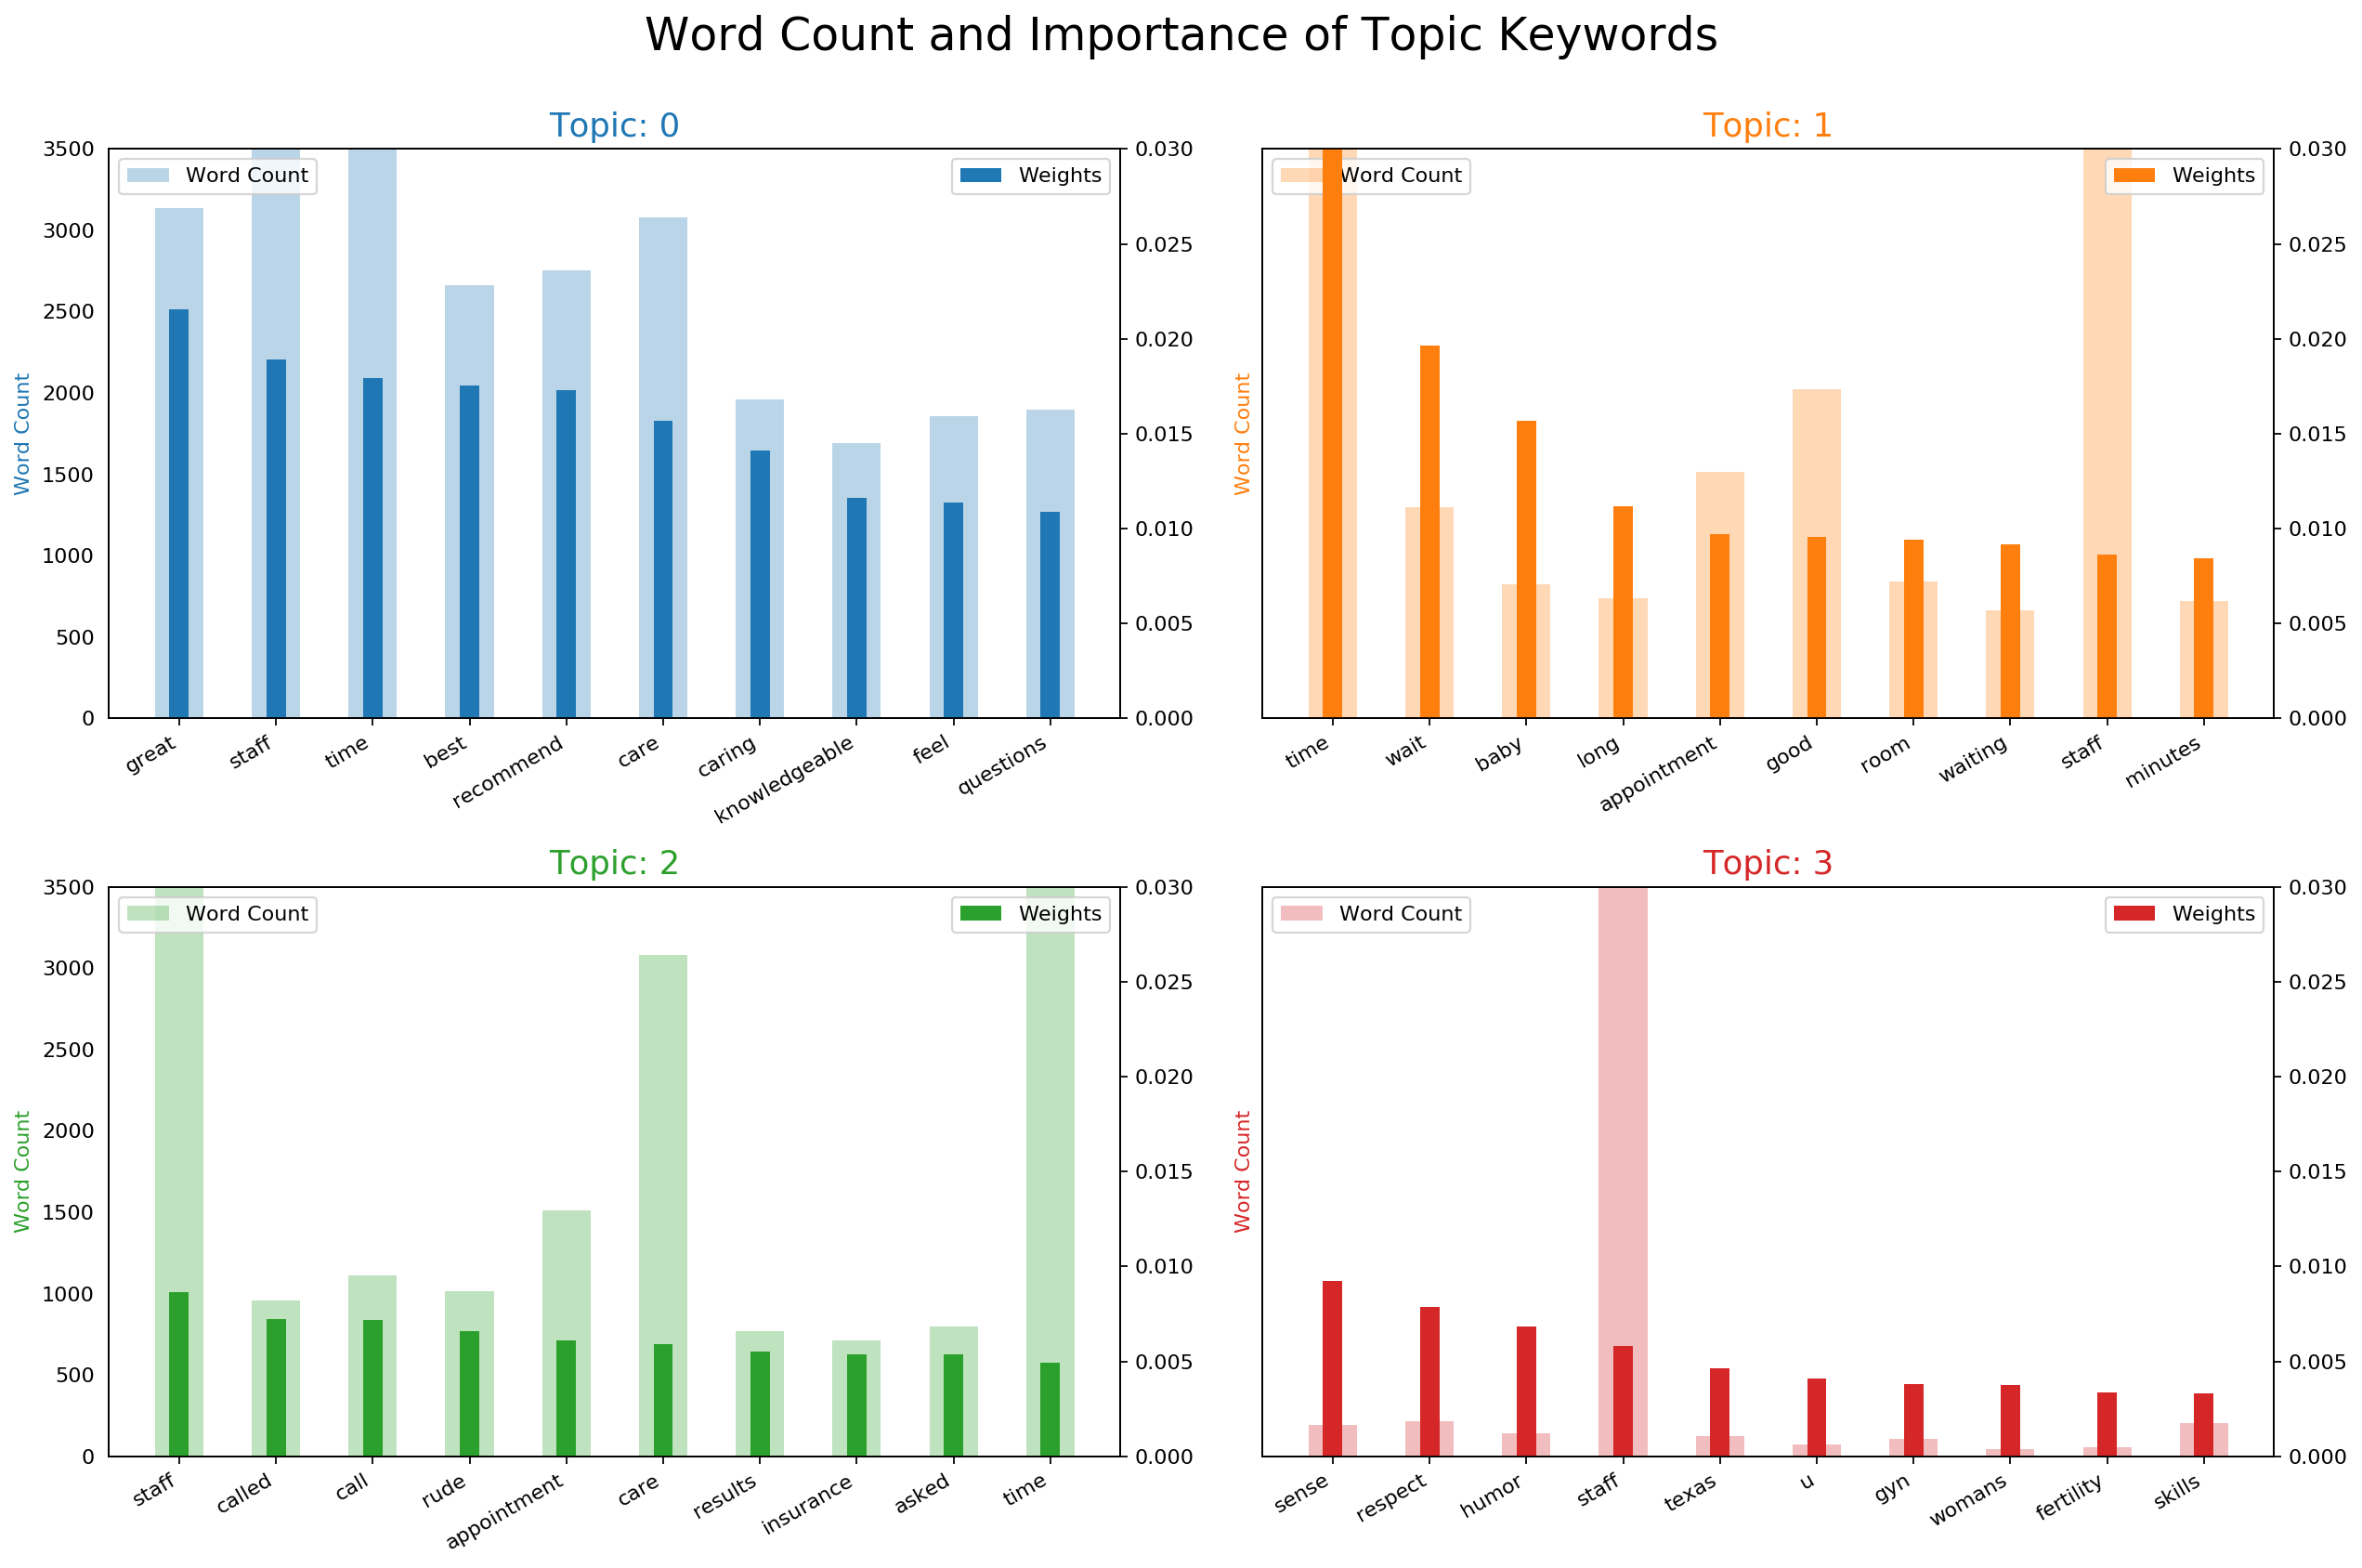

In [23]:
topics = ldamodel_all.show_topics(formatted=False)
data_flat = [w for w_list in clean_rvws_all for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
   for word, weight in topic:
       out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
   ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
   ax_twin = ax.twinx()
   ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
   ax.set_ylabel('Word Count', color=cols[i])
   ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
   ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
   ax.tick_params(axis='y', left=False)
   ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
   ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [24]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_all, doc_term_matrix_all, dictionary=ldamodel_all.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.191159  0.041527       1        1  34.543293
2     -0.123497 -0.004095       2        1  33.604362
1     -0.131478 -0.085796       3        1  16.625793
4      0.189017  0.239103       4        1  10.351268
3      0.257117 -0.190739       5        1   4.875278, topic_info=      Category         Freq            Term        Total  loglift  logprob
542    Default  1637.000000         surgery  1637.000000  30.0000  30.0000
214    Default  4720.000000            time  4720.000000  29.0000  29.0000
8      Default  2900.000000           great  2900.000000  28.0000  28.0000
677    Default  1185.000000            wait  1185.000000  27.0000  27.0000
21     Default  2453.000000            best  2453.000000  26.0000  26.0000
23     Default  1772.000000          caring  1772.000000  25.0000  25.0000
5639   Default   972.000000            baby   972.000000  24.0000  24.0000
50     Default   974.000000            life   974.000000  23.0000  23.0000
159    Default  1457.000000   knowledgeable  1457.000000  22.0000  22.0000
182    Default  1363.000000          highly  1363.000000  21.0000  21.0000
91     Default  1288.000000       excellent  1288.000000  20.0000  20.0000
89     Default  1214.000000       wonderful  1214.000000  19.0000  19.0000
296    Default  1165.000000    professional  1165.000000  18.0000  18.0000
33     Default   675.000000            long   675.000000  17.0000  17.0000
741    Default   516.000000         surgeon   516.000000  16.0000  16.0000
188    Default  2594.000000       recommend  2594.000000  15.0000  15.0000
222    Default  1920.000000       questions  1920.000000  14.0000  14.0000
156    Default  1858.000000            feel  1858.000000  13.0000  13.0000
200    Default  1122.000000            kind  1122.000000  12.0000  12.0000
1077   Default   795.000000            room   795.000000  11.0000  11.0000
665    Default   608.000000         waiting   608.000000  10.0000  10.0000
1487   Default   719.000000            pain   719.000000   9.0000   9.0000
46     Default  1459.000000     appointment  1459.000000   8.0000   8.0000
176    Default   880.000000        thorough   880.000000   7.0000   7.0000
66     Default  1188.000000            love  1188.000000   6.0000   6.0000
804    Default   617.000000         minutes   617.000000   5.0000   5.0000
59     Default  2777.000000            care  2777.000000   4.0000   4.0000
116    Default  4050.000000           staff  4050.000000   3.0000   3.0000
314    Default  1067.000000        friendly  1067.000000   2.0000   2.0000
150    Default  1116.000000          manner  1116.000000   1.0000   1.0000
23      Topic1  1771.607544          caring  1772.402954   1.0625  -4.2602
159     Topic1  1457.115845   knowledgeable  1457.912109   1.0624  -4.4557
182     Topic1  1362.389526          highly  1363.184814   1.0624  -4.5229
91      Topic1  1288.060547       excellent  1288.855957   1.0623  -4.5790
89      Topic1  1213.689575       wonderful  1214.487061   1.0623  -4.6385
296     Topic1  1165.047607    professional  1165.847656   1.0623  -4.6794
176     Topic1   879.933472        thorough   880.730042   1.0621  -4.9600
454     Topic1   710.910217         listens   711.701416   1.0618  -5.1733
154     Topic1   644.814026   compassionate   645.610291   1.0617  -5.2709
74      Topic1   504.271973           truly   505.074921   1.0614  -5.5168
168     Topic1   399.945679      personable   400.741882   1.0610  -5.7486
445     Topic1   356.067139       attentive   356.861633   1.0607  -5.8648
644     Topic1   285.170135        explains   285.962006   1.0602  -6.0868
2062    Topic1   260.439301            ease   261.243286   1.0599  -6.1775
1139    Topic1   190.015900       genuinely   190.808304   1.0588  -6.4928
983     Topic1   190.764435       efficient   191.560822   1.0588  -6.4888
148     Topic1   187.340485       fantastic   188.1467

## Topic Analysis for Good Reviews

In [0]:
# Topic Analysis for good reviews
rvws_g = stopText(reviews_good)
clean_rvws_g = [i.split() for i in rvws_g]

# Creating the term dictionary of our reviews, where every unique term is assigned an index. 
dictionary_g = corpora.Dictionary(clean_rvws_g)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_g = [dictionary_g.doc2bow(doc) for doc in clean_rvws_g]

In [26]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix for good reviews
ldamodel_g = Lda(doc_term_matrix_g, num_topics=5, id2word = dictionary_g, passes=50)

#Results
print(ldamodel_g.print_topics(num_topics=5, num_words=7))

[(0, '0.035*"time" + 0.023*"recommend" + 0.022*"caring" + 0.022*"great" + 0.022*"questions" + 0.020*"excellent" + 0.018*"knowledgeable"'), (1, '0.021*"surgery" + 0.010*"life" + 0.006*"surgeon" + 0.006*"hospital" + 0.005*"pain" + 0.005*"good" + 0.005*"thank"'), (2, '0.033*"care" + 0.023*"recommend" + 0.018*"family" + 0.013*"felt" + 0.013*"highly" + 0.012*"visit" + 0.012*"staff"'), (3, '0.027*"best" + 0.015*"delivered" + 0.015*"love" + 0.012*"baby" + 0.012*"great" + 0.011*"children" + 0.011*"pregnancy"'), (4, '0.026*"staff" + 0.025*"time" + 0.013*"great" + 0.011*"wait" + 0.010*"nice" + 0.009*"good" + 0.009*"feel"')]


<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 0')

[Text(0, 0, 'time'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'caring'),
 Text(0, 0, 'great'),
 Text(0, 0, 'questions'),
 Text(0, 0, 'excellent'),
 Text(0, 0, 'knowledgeable'),
 Text(0, 0, 'manner'),
 Text(0, 0, 'feel'),
 Text(0, 0, 'bedside')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 1')

[Text(0, 0, 'surgery'),
 Text(0, 0, 'life'),
 Text(0, 0, 'surgeon'),
 Text(0, 0, 'hospital'),
 Text(0, 0, 'pain'),
 Text(0, 0, 'good'),
 Text(0, 0, 'thank'),
 Text(0, 0, 'procedure'),
 Text(0, 0, 'care'),
 Text(0, 0, 'able')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 2')

[Text(0, 0, 'care'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'family'),
 Text(0, 0, 'felt'),
 Text(0, 0, 'highly'),
 Text(0, 0, 'visit'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'great'),
 Text(0, 0, 'friends'),
 Text(0, 0, 'health')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 3')

[Text(0, 0, 'best'),
 Text(0, 0, 'delivered'),
 Text(0, 0, 'love'),
 Text(0, 0, 'baby'),
 Text(0, 0, 'great'),
 Text(0, 0, 'children'),
 Text(0, 0, 'pregnancy'),
 Text(0, 0, 'wonderful'),
 Text(0, 0, 'son'),
 Text(0, 0, 'care')]

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

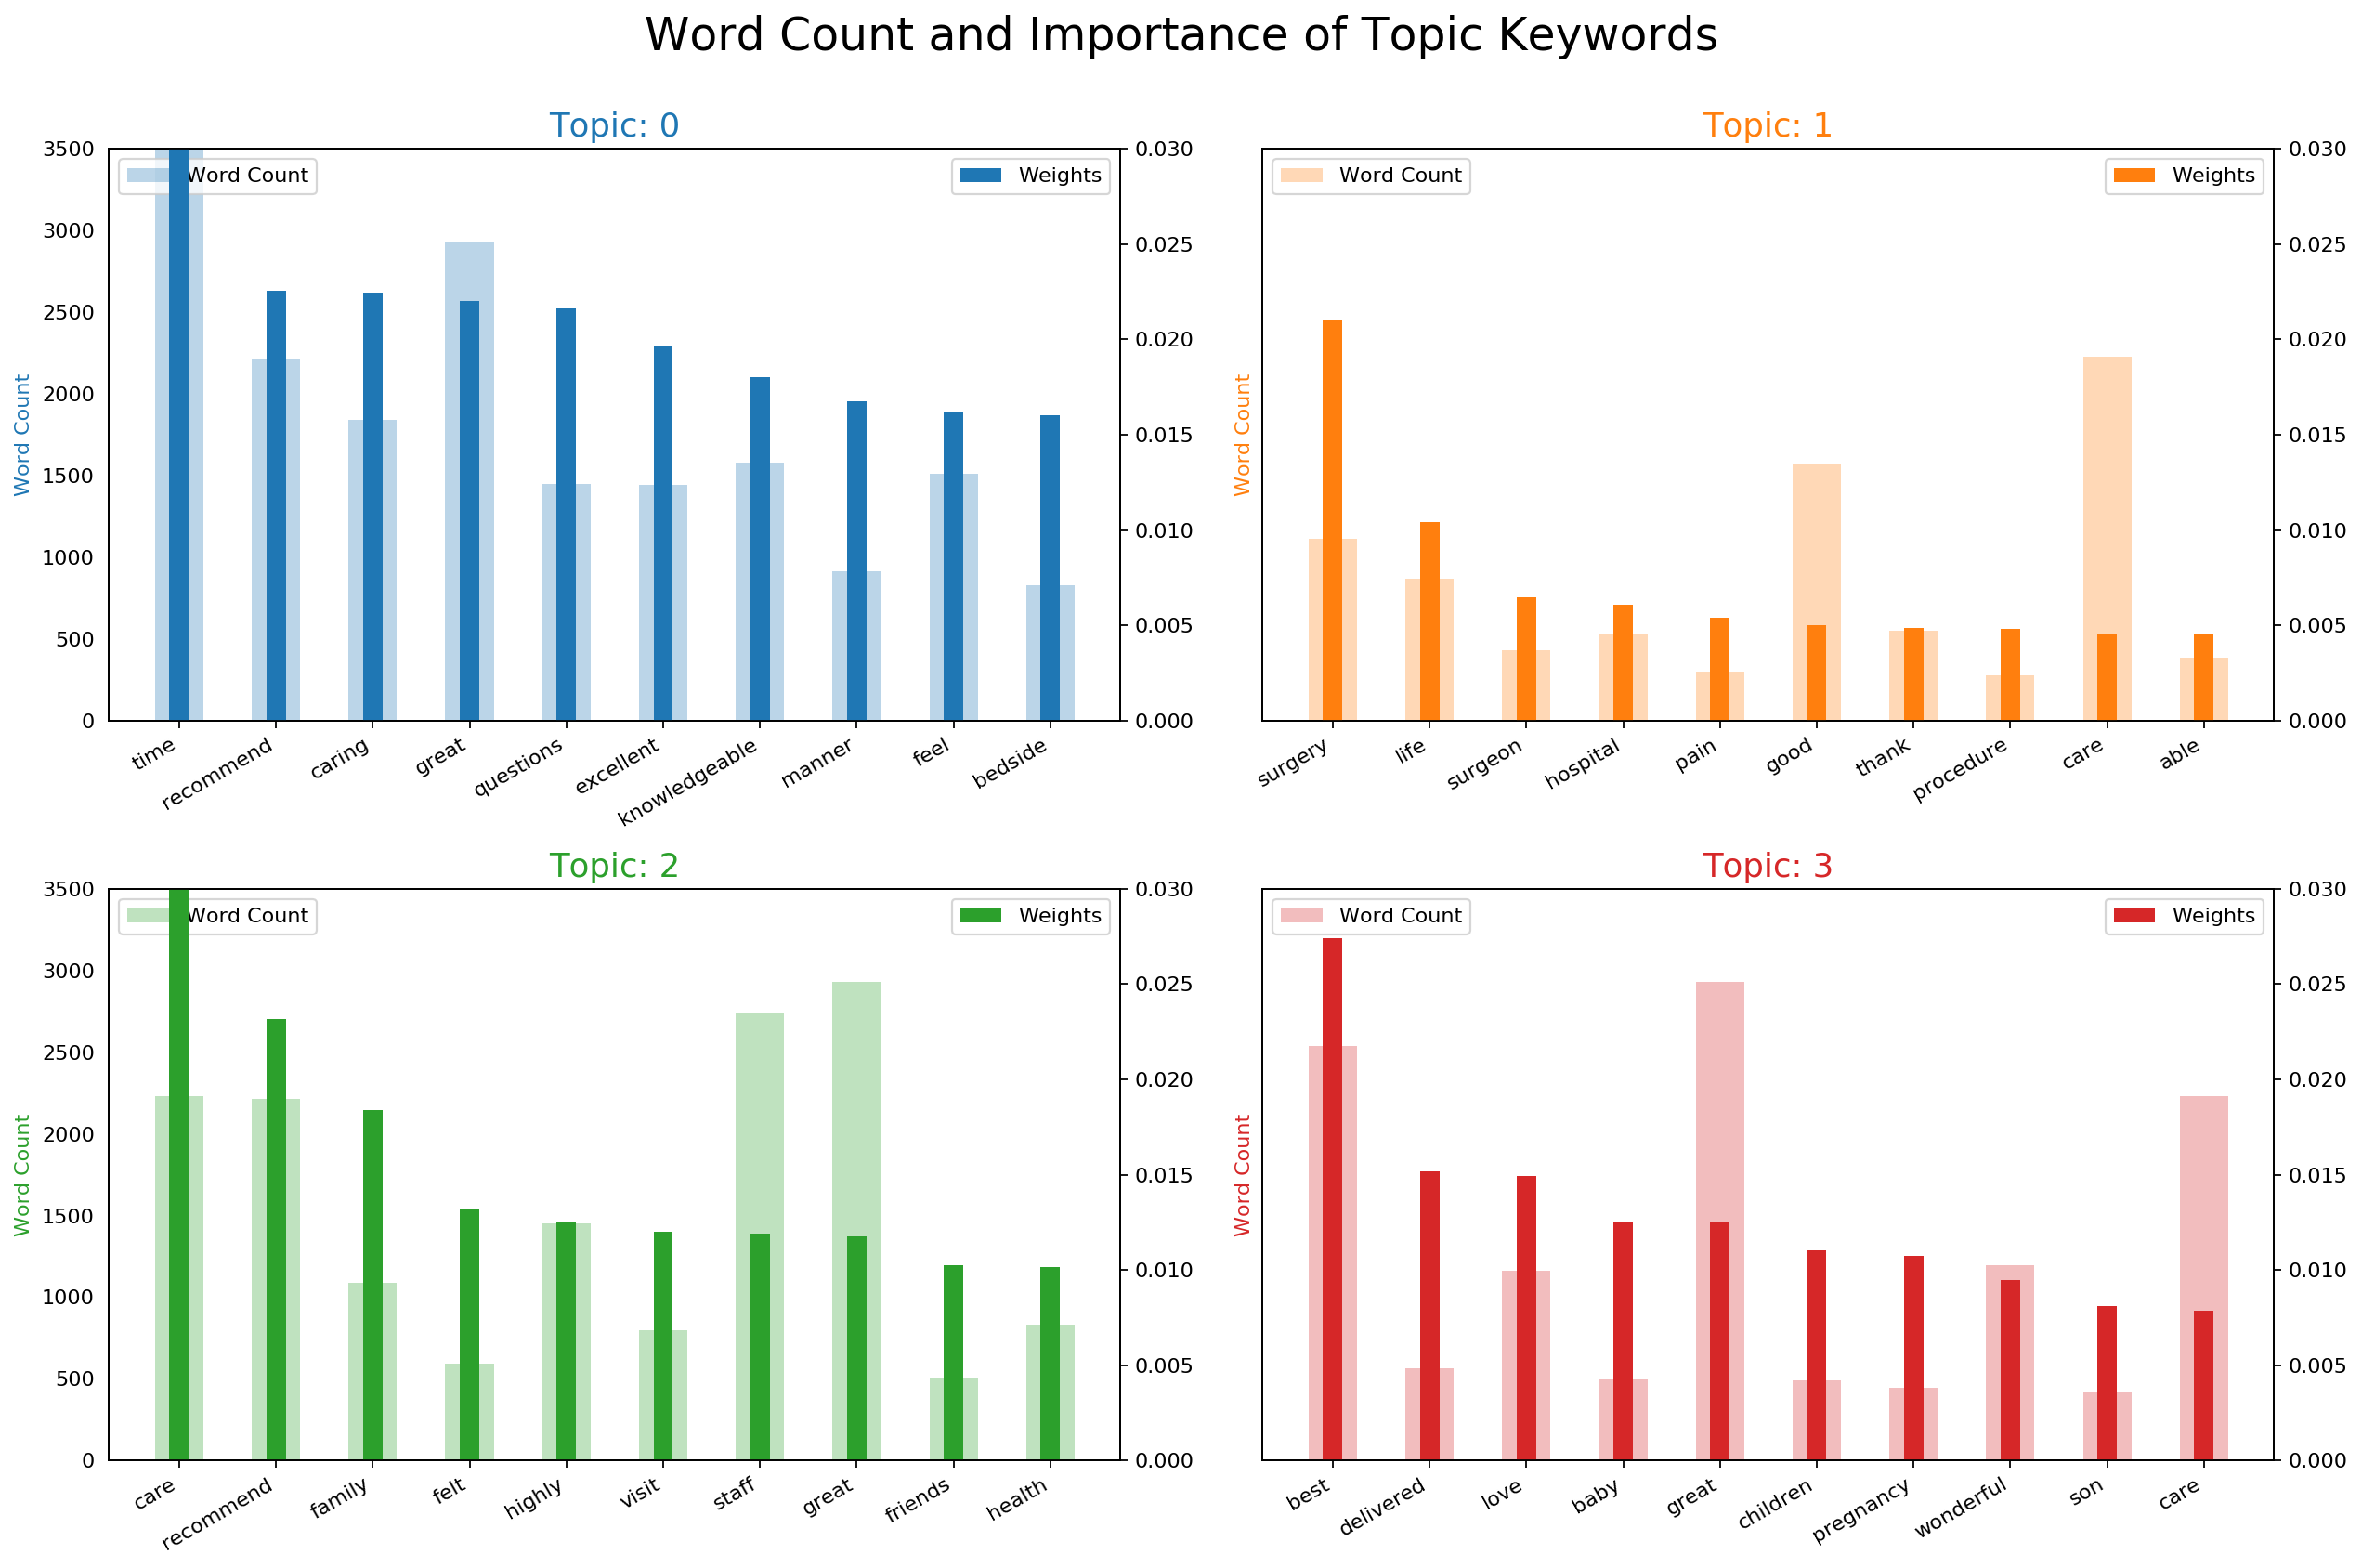

In [27]:
topics = ldamodel_g.show_topics(formatted=False)
data_flat = [w for w_list in clean_rvws_g for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
   for word, weight in topic:
       out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
   ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
   ax_twin = ax.twinx()
   ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
   ax.set_ylabel('Word Count', color=cols[i])
   ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
   ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
   ax.tick_params(axis='y', left=False)
   ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
   ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [28]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_g, doc_term_matrix_g, dictionary=ldamodel_g.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.018283 -0.138300       1        1  25.423155
1      0.227755 -0.093027       2        1  23.069195
0     -0.198894 -0.067853       3        1  20.693615
3      0.104472  0.180319       4        1  19.885899
2     -0.115050  0.118862       5        1  10.928139, topic_info=      Category         Freq           Term        Total  loglift  logprob
214    Default  3282.000000           time  3282.000000  30.0000  30.0000
440    Default  1097.000000        surgery  1097.000000  29.0000  29.0000
188    Default  2004.000000      recommend  2004.000000  28.0000  28.0000
222    Default  1387.000000      questions  1387.000000  27.0000  27.0000
59     Default  1985.000000           care  1985.000000  26.0000  26.0000
150    Default   785.000000         manner   785.000000  25.0000  25.0000
3      Default   750.000000        bedside   750.000000  24.0000  24.0000
91     Default  1234.000000      excellent  1234.000000  23.0000  23.0000
5074   Default   684.000000      delivered   684.000000  22.0000  22.0000
23     Default  1660.000000         caring  1660.000000  21.0000  21.0000
182    Default  1145.000000         highly  1145.000000  20.0000  20.0000
21     Default  2219.000000           best  2219.000000  19.0000  19.0000
4113   Default   562.000000           baby   562.000000  18.0000  18.0000
349    Default   704.000000        listens   704.000000  17.0000  17.0000
134    Default   919.000000         family   919.000000  16.0000  16.0000
581    Default   645.000000           wait   645.000000  15.0000  15.0000
116    Default  2645.000000          staff  2645.000000  14.0000  14.0000
97     Default   497.000000       children   497.000000  13.0000  13.0000
159    Default  1392.000000  knowledgeable  1392.000000  12.0000  12.0000
66     Default  1313.000000           love  1313.000000  11.0000  11.0000
689    Default   573.000000           felt   573.000000  10.0000  10.0000
314    Default   923.000000       friendly   923.000000   9.0000   9.0000
282    Default   906.000000        helpful   906.000000   8.0000   8.0000
8      Default  2663.000000          great  2663.000000   7.0000   7.0000
347    Default   789.000000       concerns   789.000000   6.0000   6.0000
296    Default  1141.000000   professional  1141.000000   5.0000   5.0000
50     Default   758.000000           life   758.000000   4.0000   4.0000
5866   Default   559.000000      pregnancy   559.000000   3.0000   3.0000
176    Default   849.000000       thorough   849.000000   2.0000   2.0000
156    Default  1515.000000           feel  1515.000000   1.0000   1.0000
581     Topic1   645.052429           wait   645.844666   1.3683  -4.4904
569     Topic1   233.067032        waiting   233.867783   1.3661  -5.5084
857     Topic1   220.852829        minutes   221.647766   1.3659  -5.5623
96      Topic1   203.379608           busy   204.174530   1.3656  -5.6447
437     Topic1   180.467224          phone   181.263504   1.3651  -5.7642
2225    Topic1   177.553406          front   178.362091   1.3650  -5.7805
375     Topic1   165.397339      sometimes   166.192917   1.3647  -5.8514
1568    Topic1   116.352753        reviews   117.150955   1.3627  -6.2031
467     Topic1    96.299187        usually    97.091621   1.3613  -6.3923
3309    Topic1    93.066536         sister    93.873207   1.3609  -6.4264
885     Topic1    87.395172           appt    88.188240   1.3605  -6.4893
336     Topic1    84.559273      everybody    85.350182   1.3602  -6.5223
7479    Topic1    83.588951          kelly    84.378845   1.3601  -6.5338
1545    Topic1    81.748215         waited    82.545013   1.3598  -6.5561
1297    Topic1    80.257301           rude    81.049370   1.3597  -6.5745
5712    Topic1    79.892082     ultrasound    80.709045   1.3593  -6.5791
2222    Topic1    71.860939           desk    72.652596   1.3586  -6.6850
2101    Topic1    69.673775

## Topic Analysis for Bad Reviews

In [0]:
# Topic Analysis for good reviews
rvws_b = stopText(reviews_bad)
clean_rvws_b = [i.split() for i in rvws_b]

# Creating the term dictionary of our reviews, where every unique term is assigned an index. 
dictionary_b = corpora.Dictionary(clean_rvws_b)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_b = [dictionary_b.doc2bow(doc) for doc in clean_rvws_b]

In [30]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix for good reviews
ldamodel_b = Lda(doc_term_matrix_b, num_topics=5, id2word = dictionary_b, passes=50)

#Results
print(ldamodel_b.print_topics(num_topics=5, num_words=7))

[(0, '0.012*"baby" + 0.009*"pain" + 0.009*"surgery" + 0.007*"hospital" + 0.007*"time" + 0.007*"care" + 0.006*"experience"'), (1, '0.009*"surgery" + 0.007*"visit" + 0.007*"time" + 0.007*"medication" + 0.006*"blood" + 0.006*"results" + 0.005*"asked"'), (2, '0.012*"rude" + 0.011*"staff" + 0.008*"care" + 0.007*"worst" + 0.007*"experience" + 0.007*"bedside" + 0.006*"manner"'), (3, '0.005*"torres" + 0.004*"’" + 0.003*"care" + 0.003*"opinion" + 0.003*"weight" + 0.003*"state" + 0.003*"board"'), (4, '0.020*"time" + 0.017*"staff" + 0.016*"appointment" + 0.011*"call" + 0.011*"wait" + 0.010*"called" + 0.008*"waiting"')]


<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 0')

[Text(0, 0, 'baby'),
 Text(0, 0, 'pain'),
 Text(0, 0, 'surgery'),
 Text(0, 0, 'hospital'),
 Text(0, 0, 'time'),
 Text(0, 0, 'care'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'pregnancy'),
 Text(0, 0, 'know'),
 Text(0, 0, 'feel')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 1')

[Text(0, 0, 'surgery'),
 Text(0, 0, 'visit'),
 Text(0, 0, 'time'),
 Text(0, 0, 'medication'),
 Text(0, 0, 'blood'),
 Text(0, 0, 'results'),
 Text(0, 0, 'asked'),
 Text(0, 0, 'test'),
 Text(0, 0, 'tests'),
 Text(0, 0, 'take')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 2')

[Text(0, 0, 'rude'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'care'),
 Text(0, 0, 'worst'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'bedside'),
 Text(0, 0, 'manner'),
 Text(0, 0, 'know'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'questions')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 3')

[Text(0, 0, 'torres'),
 Text(0, 0, '’'),
 Text(0, 0, 'care'),
 Text(0, 0, 'opinion'),
 Text(0, 0, 'weight'),
 Text(0, 0, 'state'),
 Text(0, 0, 'board'),
 Text(0, 0, 'records'),
 Text(0, 0, 'diagnosis'),
 Text(0, 0, 'visit')]

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

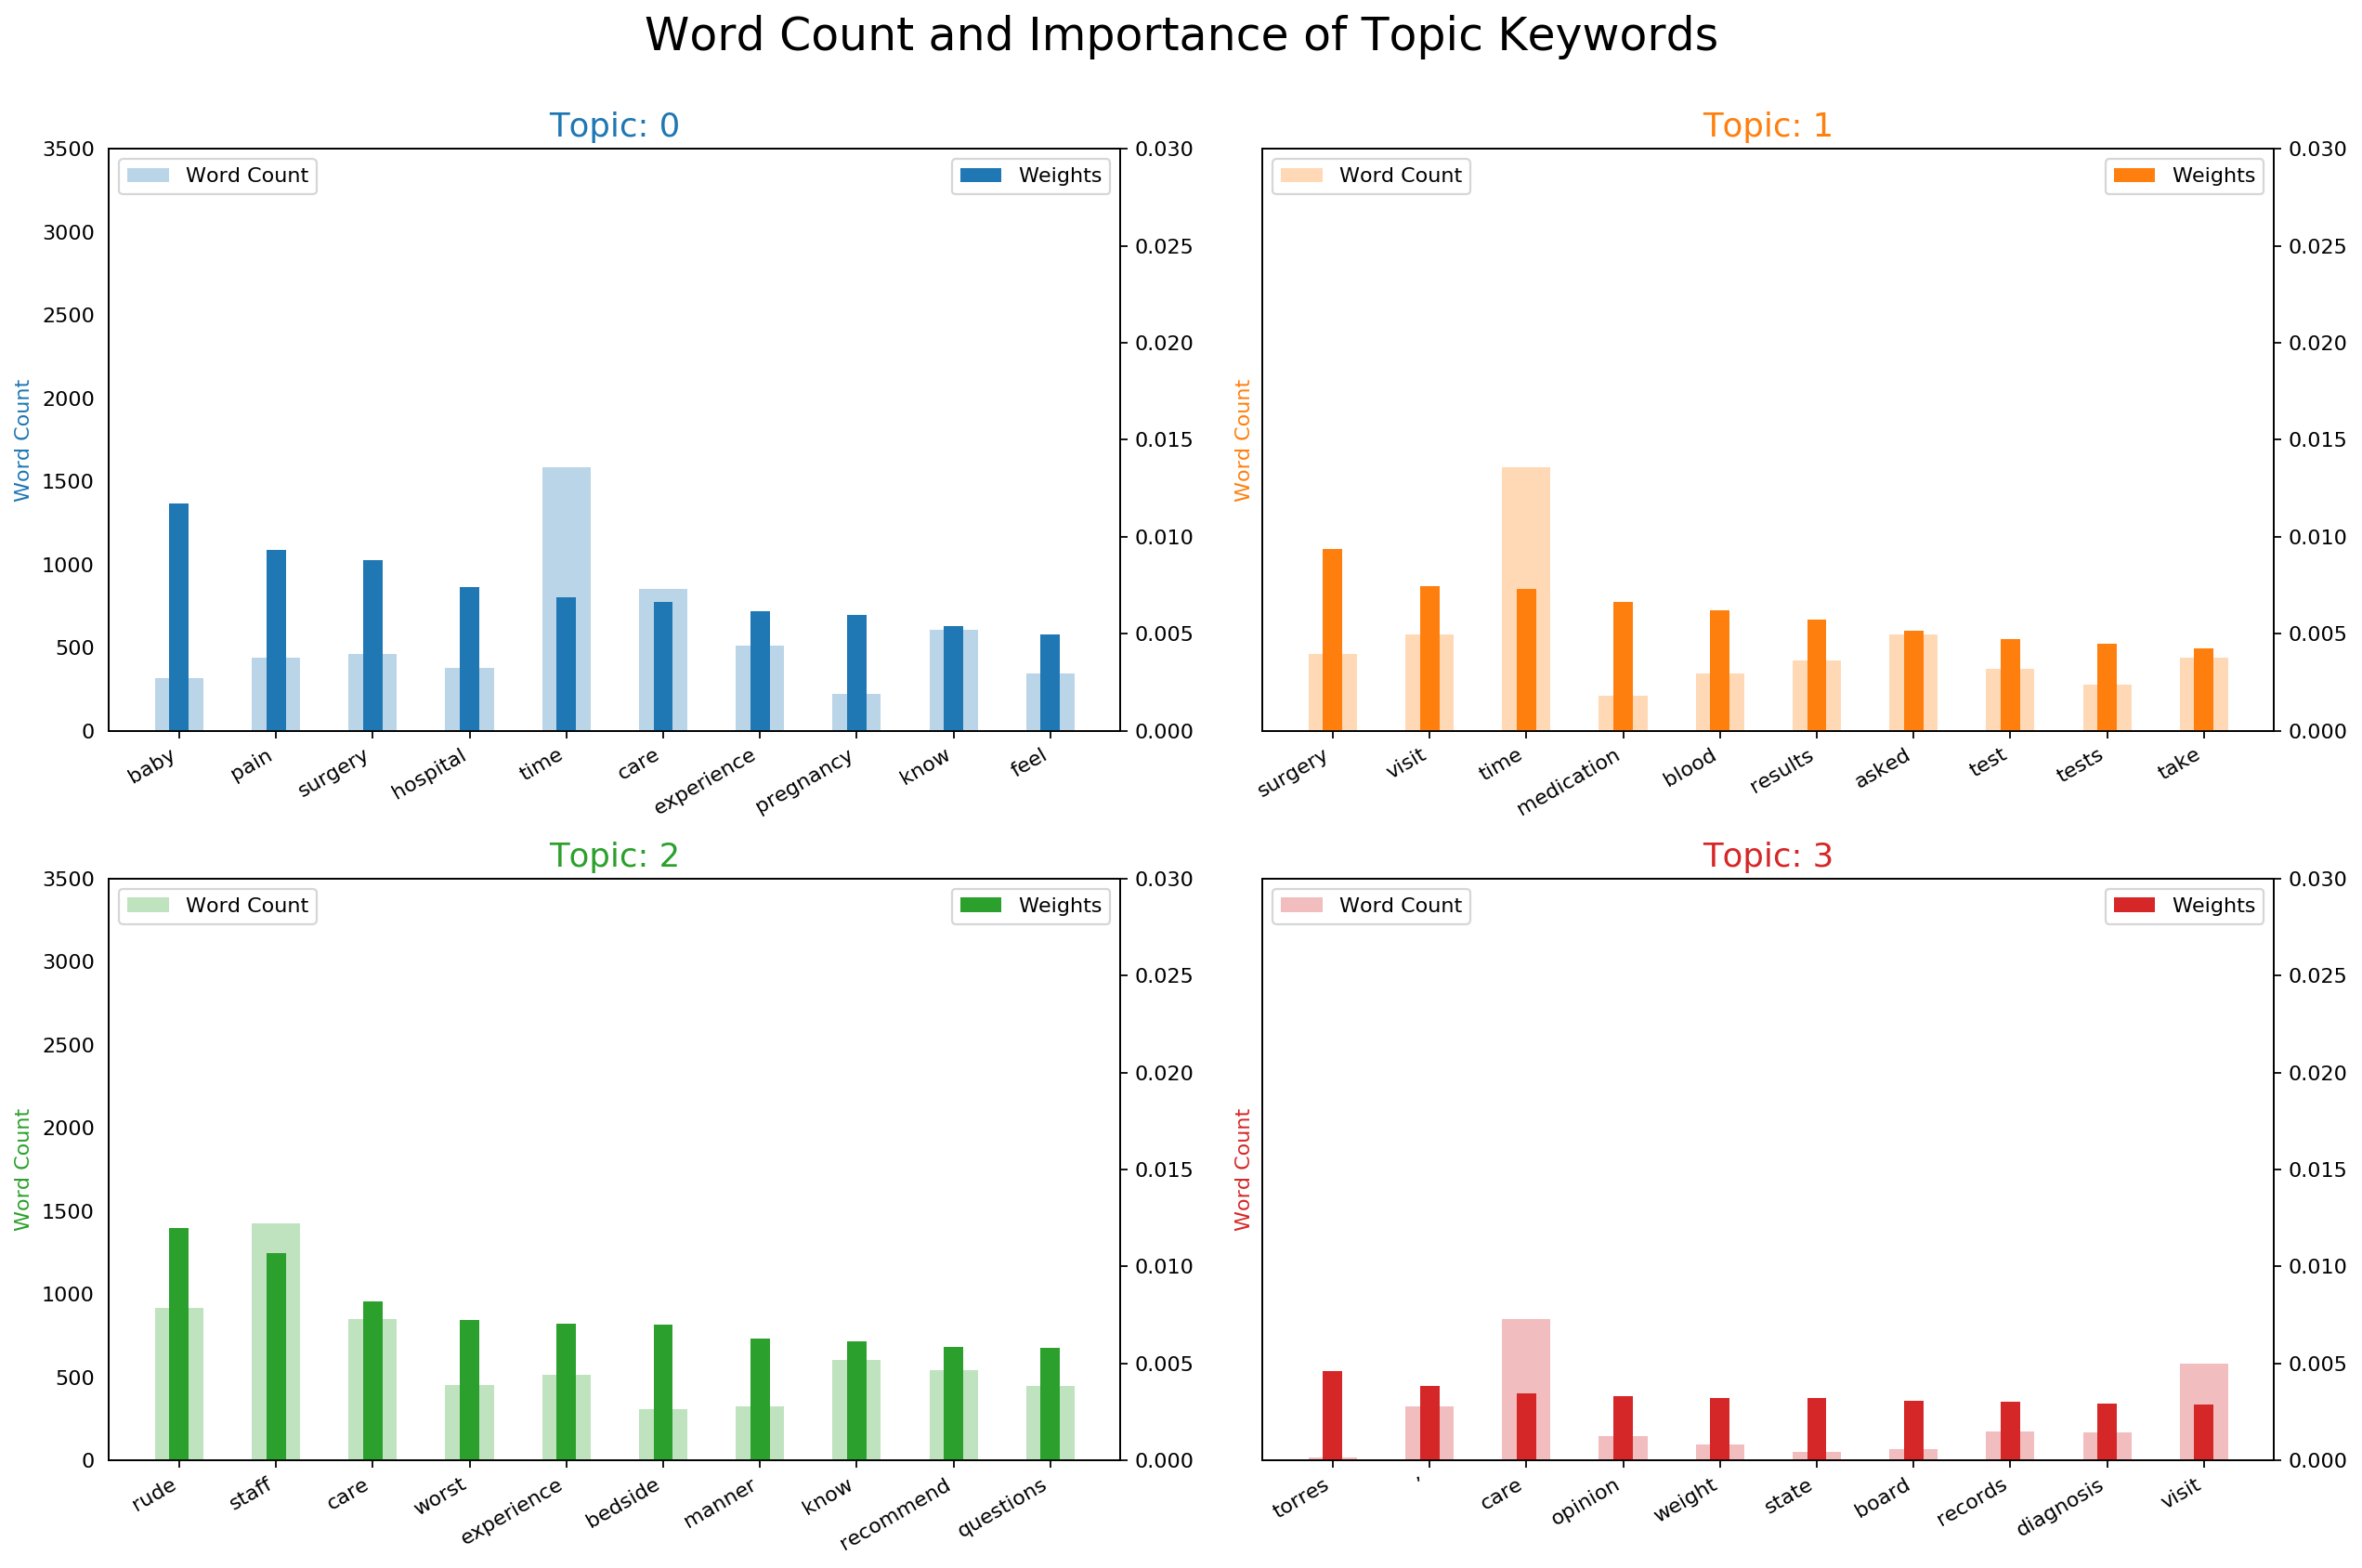

In [31]:
topics = ldamodel_b.show_topics(formatted=False)
data_flat = [w for w_list in clean_rvws_b for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
   for word, weight in topic:
       out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
   ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
   ax_twin = ax.twinx()
   ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
   ax.set_ylabel('Word Count', color=cols[i])
   ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
   ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
   ax.tick_params(axis='y', left=False)
   ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
   ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_b, doc_term_matrix_b, dictionary=ldamodel_b.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.136959  0.004612       1        1  38.675159
2     -0.084481  0.051790       2        1  24.220016
0     -0.079400  0.054987       3        1  16.531410
1      0.058517 -0.197843       4        1  13.874218
3      0.242324  0.086455       5        1   6.699190, topic_info=      Category         Freq            Term        Total  loglift  logprob
2      Default   863.000000     appointment   863.000000  30.0000  30.0000
159    Default   566.000000            wait   566.000000  29.0000  29.0000
4046   Default   363.000000            baby   363.000000  28.0000  28.0000
92     Default  1277.000000           staff  1277.000000  27.0000  27.0000
248    Default   436.000000         waiting   436.000000  26.0000  26.0000
380    Default   435.000000         surgery   435.000000  25.0000  25.0000
153    Default   419.000000         minutes   419.000000  24.0000  24.0000
86     Default   852.000000            rude   852.000000  23.0000  23.0000
488    Default   371.000000            pain   371.000000  22.0000  22.0000
243    Default   329.000000            hour   329.000000  21.0000  21.0000
72     Default   333.000000           phone   333.000000  20.0000  20.0000
10     Default   635.000000            call   635.000000  19.0000  19.0000
119    Default   294.000000         bedside   294.000000  18.0000  18.0000
34     Default   531.000000      experience   531.000000  17.0000  17.0000
403    Default   169.000000      medication   169.000000  16.0000  16.0000
244    Default   318.000000           hours   318.000000  15.0000  15.0000
850    Default   292.000000           blood   292.000000  14.0000  14.0000
50     Default   408.000000       insurance   408.000000  13.0000  13.0000
100    Default  1483.000000            time  1483.000000  12.0000  12.0000
139    Default   436.000000           worst   436.000000  11.0000  11.0000
13     Default   720.000000            care   720.000000  10.0000  10.0000
273    Default   277.000000          waited   277.000000   9.0000   9.0000
3819   Default   280.000000       pregnancy   280.000000   8.0000   8.0000
811    Default   205.000000           calls   205.000000   7.0000   7.0000
463    Default   259.000000               ’   259.000000   6.0000   6.0000
317    Default   527.000000           visit   527.000000   5.0000   5.0000
152    Default   301.000000          manner   301.000000   4.0000   4.0000
425    Default   434.000000         results   434.000000   3.0000   3.0000
246    Default   515.000000            room   515.000000   2.0000   2.0000
80     Default   171.000000         records   171.000000   1.0000   1.0000
159     Topic1   566.062805            wait   566.744385   0.9488  -4.5393
248     Topic1   435.261841         waiting   436.337219   0.9475  -4.8020
811     Topic1   204.832642           calls   205.526581   0.9466  -5.5558
141     Topic1   123.361511        schedule   124.044365   0.9445  -6.0628
1827    Topic1    90.173874            mins    90.851349   0.9425  -6.3762
2140    Topic1    88.018456            hold    88.695198   0.9423  -6.4004
771     Topic1    88.163834    receptionist    88.844109   0.9423  -6.3988
4       Topic1    71.610062         arrived    72.291374   0.9405  -6.6067
452     Topic1    62.845924      reschedule    63.522476   0.9393  -6.7373
2333    Topic1    63.068993              pm    63.748039   0.9393  -6.7337
1167    Topic1    57.470982             hrs    58.154659   0.9381  -6.8267
243     Topic1   325.733582            hour   329.627441   0.9381  -5.0919
857     Topic1    48.018570          refill    48.697216   0.9359  -7.0064
1809    Topic1    45.579781           extra    46.264919   0.9351  -7.0585
678     Topic1    40.449493         respond    41.132378   0.9332  -7.1779
153     Topic1   413.017731         minutes   419.997284   0.9332  -4.8545
1053    Topic1    38.368134            cash    39.0603

# Analysis Based on Each of the Six Specialties

### General Practitioners

In [33]:
# Clean Null Values
df_gp = df_gp[df_gp.review.notnull()]
df_gp = df_gp[df_gp.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_gp = df_gp[['individual_rating', 'review']]
df_gp.individual_rating = df_gp.individual_rating.astype(float)
df_gp = df_gp[(df_gp.individual_rating >= 4) | (df_gp.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_gp['is_good'] = (df_gp.individual_rating >= 4) * 1 + (df_gp.individual_rating < 3) * 0


gp_sub = df_gp.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_gp = vec.fit_transform(gp_sub)
dtm_gp = pd.DataFrame(X_gp.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_gp = dtm_gp.T
print(tdm_gp.shape)

(3756, 2836)


### Calculate Fisher's Discriminant Score

In [34]:
mask_gp = pd.DataFrame(df_gp.is_good)
good_df_gp = dtm.iloc[np.any(mask_gp.values,axis=1),]
bad_df_gp = dtm.iloc[~np.any(mask_gp.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df) + len(good_df))/len(dtm)

1.0

In [35]:
FiDi_gp = pd.DataFrame(((good_df_gp.mean() - bad_df_gp.mean())**2)/(np.std(good_df_gp)**2 + np.std(bad_df_gp)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_gp = FiDi_gp.term.tolist()
words_gp = stopText(words_gp)
words_gp = stopOther(words_gp)

words_gp = pd.Series(words_gp).str.lstrip(" ").tolist()

FiDi_gp = FiDi_gp[FiDi_gp.term.isin(words_gp)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_gp.head(25)

,term,FiDi_score
4743,excellent_doctor_very,0.008439
17198,well_he,0.008043
8881,life_he,0.007506
10829,of_that,0.007503
4446,easy_to,0.006757
10069,my_ob,0.006751
4059,doctor_very,0.006728
1086,and_it_was,0.006590
3509,credit,0.006522
7331,his_nurse,0.006504


### Create DF of most Frequent Words

In [36]:
tdm_gp['total'] = tdm_gp.sum(axis =1)
freq_gp = tdm_gp.reset_index().rename(columns = {"level_0":"allwords"})

words2_gp = freq_gp.allwords.tolist()
words2_gp = stopText(words2_gp)
words2_gp = stopOther(words2_gp)

words2_gp = pd.Series(words2_gp).str.lstrip(" ").tolist()

freq_gp = freq_gp[freq_gp.allwords.isin(words2_gp)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_gp.head(25)

,allwords,total
3089,time,924
2769,staff,701
571,care,541
1182,great,499
965,family,408
2455,recommend,396
1170,good,372
481,best,364
593,caring,329
316,appointment,325


### Most frequent phrases

In [37]:
freq_gp['under_count'] = freq_gp.allwords.str.count('_')
freq_gp[freq_gp.under_count>=3].head(25)

,allwords,total,under_count
2841,takes_the_time_to,65,3
2238,one_of_the_best,52,3
3103,time_to_listen_to,38,3
1642,is_the_best_doctor,34,3
1256,have_been_going_to,33,3
3002,the_time_to_listen,33,3
454,been_going_to_dr,31,3
589,cares_about_his_patients,31,3
1260,have_been_patient_of,29,3
1553,in_the_waiting_room,25,3


## Cardiology

In [38]:
# Clean Null Values
df_cardio = df_cardio[df_cardio.review.notnull()]
df_cardio = df_cardio[df_cardio.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_cardio = df_cardio[['individual_rating', 'review']]
df_cardio.individual_rating = df_cardio.individual_rating.astype(float)
df_cardio = df_cardio[(df_cardio.individual_rating >= 4) | (df_cardio.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_cardio['is_good'] = (df_cardio.individual_rating >= 4) * 1 + (df_cardio.individual_rating < 3) * 0


cardio_sub = df_cardio.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_cardio = vec.fit_transform(cardio_sub)
dtm_cardio = pd.DataFrame(X_cardio.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_cardio = dtm_cardio.T
print(tdm_cardio.shape)

(1284, 1157)


### Calculate Fisher's Discriminant Score

In [39]:
mask_cardio = pd.DataFrame(df_cardio.is_good)
good_df_cardio = dtm.iloc[np.any(mask_cardio.values,axis=1),]
bad_df_cardio = dtm.iloc[~np.any(mask_cardio.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_cardio) + len(good_df_cardio))/len(dtm_cardio)

1.0

In [40]:
FiDi_cardio = pd.DataFrame(((good_df_cardio.mean() - bad_df_cardio.mean())**2)/(np.std(good_df_cardio)**2 + np.std(bad_df_cardio)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_cardio = FiDi_cardio.term.tolist()
words_cardio = stopText(words_cardio)
words_cardio = stopOther(words_cardio)

words_cardio = pd.Series(words_cardio).str.lstrip(" ").tolist()

FiDi_cardio = FiDi_cardio[FiDi_cardio.term.isin(words_cardio)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_cardio.head(25)

,term,FiDi_score
5896,great,0.024043
184,about_the,0.022205
2329,been_going_to,0.020474
3544,daughter,0.019975
11751,positive,0.018488
5812,going_to_dr,0.018280
5904,great_bedside,0.018280
7949,instead,0.018280
5535,friends,0.017407
10926,office_is,0.017404


### Create DF of most Frequent Words

In [41]:
tdm_cardio['total'] = tdm_cardio.sum(axis =1)
freq_cardio = tdm_cardio.reset_index().rename(columns = {"level_0":"allwords"})

words2_cardio = freq_cardio.allwords.tolist()
words2_cardio = stopText(words2_cardio)
words2_cardio = stopOther(words2_cardio)

words2_cardio = pd.Series(words2_cardio).str.lstrip(" ").tolist()

freq_cardio = freq_cardio[freq_cardio.allwords.isin(words2_cardio)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_cardio.head(25)

,allwords,total
1061,time,330
946,staff,308
409,great,240
494,heart,199
200,care,197
861,recommend,187
162,best,175
319,excellent,157
405,good,148
210,caring,143


### Most frequent phrases

In [42]:
freq_cardio['under_count'] = freq_cardio.allwords.str.count('_')
freq_cardio[freq_cardio.under_count>=3].head(25)

,allwords,total,under_count
785,one_of_the_best,23,3
866,recommend_him_to_anyone,21,3
973,takes_the_time_to,21,3
154,been_patient_of_dr,18,3
442,have_been_patient_of,18,3
443,have_been_patient_of_dr,16,4
208,cares_about_his_patients,15,3
434,has_been_my_cardiologist,14,3
469,he_has_been_my,13,3
1031,the_time_to_explain,13,3


## Internal Medicine

In [43]:
# Clean Null Values
df_intern = df_intern[df_intern.review.notnull()]
df_intern = df_intern[df_intern.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_intern = df_intern[['individual_rating', 'review']]
df_intern.individual_rating = df_intern.individual_rating.astype(float)
df_intern = df_intern[(df_intern.individual_rating >= 4) | (df_intern.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_intern['is_good'] = (df_intern.individual_rating >= 4) * 1 + (df_intern.individual_rating < 3) * 0


intern_sub = df_intern.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_intern = vec.fit_transform(intern_sub)
dtm_intern = pd.DataFrame(X_intern.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_intern = dtm_intern.T
print(tdm_intern.shape)

(5715, 4486)


### Calculate Fisher's Discriminant Score

In [44]:
mask_intern = pd.DataFrame(df_intern.is_good)
good_df_intern = dtm.iloc[np.any(mask_intern.values,axis=1),]
bad_df_intern = dtm.iloc[~np.any(mask_intern.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_intern) + len(good_df_intern))/len(dtm_intern)

1.0

In [45]:
FiDi_intern = pd.DataFrame(((good_df_intern.mean() - bad_df_intern.mean())**2)/(np.std(good_df_intern)**2 + np.std(bad_df_intern)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_intern = FiDi_intern.term.tolist()
words_intern = stopText(words_intern)
words_intern = stopOther(words_intern)

words_intern = pd.Series(words_intern).str.lstrip(" ").tolist()

FiDi_intern = FiDi_intern[FiDi_intern.term.isin(words_intern)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_intern.head(25)

,term,FiDi_score
14969,this_doctor_is,0.007916
1710,appointment_with,0.006652
11547,pay_for_the,0.006339
1711,appointment_with_dr,0.006258
13661,stopped,0.005711
934,and_feel,0.005629
13909,talk_about,0.005629
689,an_appt_with,0.005542
18206,you_understand,0.005000
111,45,0.004753


### Create DF of most Frequent Words

In [46]:
tdm_intern['total'] = tdm_intern.sum(axis =1)
freq_intern = tdm_intern.reset_index().rename(columns = {"level_0":"allwords"})

words2_intern = freq_intern.allwords.tolist()
words2_intern = stopText(words2_intern)
words2_intern = stopOther(words2_intern)

words2_intern = pd.Series(words2_intern).str.lstrip(" ").tolist()

freq_intern = freq_intern[freq_intern.allwords.isin(words2_intern)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_intern.head(25)

,allwords,total
4683,time,1469
4202,staff,997
896,care,890
1835,great,729
3763,recommend,694
747,best,633
1814,good,587
929,caring,580
2661,knowledgeable,500
4418,the_best,481


### Most frequent phrases

In [47]:
freq_intern['under_count'] = freq_intern.allwords.str.count('_')
freq_intern[freq_intern.under_count>=3].head(25)

,allwords,total,under_count
4300,takes_the_time_to,93,3
3423,one_of_the_best,69,3
4557,the_time_to_listen,58,3
2543,is_the_best_doctor,56,3
4706,time_to_listen_to,55,3
727,been_patient_of_dr,54,3
922,cares_about_his_patients,50,3
1946,have_been_patient_of,48,3
2050,he_is_the_best,44,3
1947,have_been_patient_of_dr,43,4


## Paediatrics

In [48]:
# Clean Null Values
df_ped = df_ped[df_ped.review.notnull()]
df_ped = df_ped[df_ped.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_ped = df_ped[['individual_rating', 'review']]
df_ped.individual_rating = df_ped.individual_rating.astype(float)
df_ped = df_ped[(df_ped.individual_rating >= 4) | (df_ped.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_ped['is_good'] = (df_ped.individual_rating >= 4) * 1 + (df_ped.individual_rating < 3) * 0


ped_sub = df_ped.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_ped = vec.fit_transform(ped_sub)
dtm_ped = pd.DataFrame(X_ped.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_ped = dtm_ped.T
print(tdm_ped.shape)

(1816, 1296)


### Calculate Fisher's Discriminant Score

In [49]:
mask_ped = pd.DataFrame(df_ped.is_good)
good_df_ped = dtm.iloc[np.any(mask_ped.values,axis=1),]
bad_df_ped = dtm.iloc[~np.any(mask_ped.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_ped) + len(good_df_ped))/len(dtm_ped)

1.0

In [50]:
FiDi_ped = pd.DataFrame(((good_df_ped.mean() - bad_df_ped.mean())**2)/(np.std(good_df_ped)**2 + np.std(bad_df_ped)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_ped = FiDi_ped.term.tolist()
words_ped = stopText(words_ped)
words_ped = stopOther(words_ped)

words_ped = pd.Series(words_ped).str.lstrip(" ").tolist()

FiDi_ped = FiDi_ped[FiDi_ped.term.isin(words_ped)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_ped.head(25)

,term,FiDi_score
11166,options,0.023819
3992,doctor_in,0.018424
3518,ct_scan,0.016892
1728,approachable,0.016892
3907,doc,0.016876
16004,took_the,0.016343
13021,she_made,0.015928
12252,referred,0.015916
17908,would_highly_recommend,0.015362
12638,scheduled,0.015061


### Create DF of most Frequent Words

In [51]:
tdm_ped['total'] = tdm_ped.sum(axis =1)
freq_ped = tdm_ped.reset_index().rename(columns = {"level_0":"allwords"})

words2_ped = freq_ped.allwords.tolist()
words2_ped = stopText(words2_ped)
words2_ped = stopOther(words2_ped)

words2_ped = pd.Series(words2_ped).str.lstrip(" ").tolist()

freq_ped = freq_ped[freq_ped.allwords.isin(words2_ped)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_ped.head(25)

,allwords,total
1476,time,409
576,great,333
301,children,319
1314,staff,289
1295,son,288
811,kids,257
295,child,257
337,daughter,249
278,care,239
1099,pediatrician,238


### Most frequent phrases

In [52]:
freq_ped['under_count'] = freq_ped.allwords.str.count('_')
freq_ped[freq_ped.under_count>=3].head(25)

,allwords,total,under_count
1343,takes_the_time_to,24,3
788,is_the_best_pediatrician,18,3
1252,she_is_the_best,16,3
1561,took_the_time_to,15,3
641,he_is_the_best,15,3
1052,one_of_the_best,15,3
787,is_the_best_doctor,14,3
1171,recommend_this_doctor_to,14,3
1165,recommend_her_to_anyone,14,3
953,my_family_and_friends,13,3


## General Surgery

In [53]:
# Clean Null Values
df_surg = df_surg[df_surg.review.notnull()]
df_surg = df_surg[df_surg.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_surg = df_surg[['individual_rating', 'review']]
df_surg.individual_rating = df_surg.individual_rating.astype(float)
df_surg = df_surg[(df_surg.individual_rating >= 4) | (df_surg.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_surg['is_good'] = (df_surg.individual_rating >= 4) * 1 + (df_surg.individual_rating < 3) * 0


surg_sub = df_surg.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_surg = vec.fit_transform(surg_sub)
dtm_surg = pd.DataFrame(X_surg.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_surg = dtm_surg.T
print(tdm_surg.shape)

(1785, 1345)


### Calculate Fisher's Discriminant Score

In [54]:
mask_surg = pd.DataFrame(df_surg.is_good)
good_df_surg = dtm.iloc[np.any(mask_surg.values,axis=1),]
bad_df_surg = dtm.iloc[~np.any(mask_surg.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_surg) + len(good_df_surg))/len(dtm_surg)

1.0

In [55]:
FiDi_surg = pd.DataFrame(((good_df_surg.mean() - bad_df_surg.mean())**2)/(np.std(good_df_surg)**2 + np.std(bad_df_surg)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_surg = FiDi_surg.term.tolist()
words_surg = stopText(words_surg)
words_surg = stopOther(words_surg)

words_surg = pd.Series(words_surg).str.lstrip(" ").tolist()

FiDi_surg = FiDi_surg[FiDi_surg.term.isin(words_surg)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_surg.head(25)

,term,FiDi_score
1960,asks,0.019364
6583,he_has_been,0.018461
31,15_years,0.018327
13381,someone,0.017161
13774,surgery_and,0.017045
5010,feel_safe,0.016779
12527,safe,0.016779
1714,appointments,0.015925
15945,told_me,0.015665
27,15,0.015368


### Create DF of most Frequent Words

In [56]:
tdm_surg['total'] = tdm_surg.sum(axis =1)
freq_surg = tdm_surg.reset_index().rename(columns = {"level_0":"allwords"})

words2_surg = freq_surg.allwords.tolist()
words2_surg = stopText(words2_surg)
words2_surg = stopOther(words2_surg)

words2_surg = pd.Series(words2_surg).str.lstrip(" ").tolist()

freq_surg = freq_surg[freq_surg.allwords.isin(words2_surg)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_surg.head(25)

,allwords,total
1321,surgery,712
1313,surgeon,336
1468,time,327
1290,staff,302
1181,recommend,268
561,great,265
222,best,244
268,care,227
852,life,221
1385,the_best,191


### Most frequent phrases

In [57]:
freq_surg['under_count'] = freq_surg.allwords.str.count('_')
freq_surg[freq_surg.under_count>=3].head(25)

,allwords,total,under_count
1186,recommend_him_to_anyone,32,3
1757,would_recommend_him_to,29,3
635,he_is_the_best,26,3
1067,one_of_the_best,20,3
1758,would_recommend_him_to_anyone,19,4
1553,took_the_time_to,17,3
637,he_is_very_caring,16,3
278,cares_about_his_patients,15,3
147,answered_all_my_questions,14,3
1189,recommend_this_doctor_to,13,3


## OBGYN

In [58]:
# Clean Null Values
df_ob = df_ob[df_ob.review.notnull()]
df_ob = df_ob[df_ob.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_ob = df_ob[['individual_rating', 'review']]
df_ob.individual_rating = df_ob.individual_rating.astype(float)
df_ob = df_ob[(df_ob.individual_rating >= 4) | (df_ob.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_ob['is_good'] = (df_ob.individual_rating >= 4) * 1 + (df_ob.individual_rating < 3) * 0


ob_sub = df_ob.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_ob = vec.fit_transform(ob_sub)
dtm_ob = pd.DataFrame(X_ob.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_ob = dtm_ob.T
print(tdm_ob.shape)

(9511, 5541)


### Calculate Fisher's Discriminant Score

In [59]:
mask_ob = pd.DataFrame(df_ob.is_good)
good_df_ob = dtm.iloc[np.any(mask_ob.values,axis=1),]
bad_df_ob = dtm.iloc[~np.any(mask_ob.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_ob) + len(good_df_ob))/len(dtm_ob)

1.0

In [60]:
FiDi_ob = pd.DataFrame(((good_df_ob.mean() - bad_df_ob.mean())**2)/(np.std(good_df_ob)**2 + np.std(bad_df_ob)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_ob = FiDi_ob.term.tolist()
words_ob = stopText(words_ob)
words_ob = stopOther(words_ob)

words_ob = pd.Series(words_ob).str.lstrip(" ").tolist()

FiDi_ob = FiDi_ob[FiDi_ob.term.isin(words_ob)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_ob.head(25)

,term,FiDi_score
6686,he_knows,0.005642
8935,like_was,0.004841
5364,for_one,0.004752
14553,the_outcome,0.004711
4981,feel_at_ease,0.004459
9106,lot_of_time,0.004436
9330,matter_how,0.004314
8734,knows_what_he,0.004210
10906,office_after,0.004182
7612,if_you_have,0.004173


### Create DF of most Frequent Words

In [61]:
tdm_ob['total'] = tdm_ob.sum(axis =1)
freq_ob = tdm_ob.reset_index().rename(columns = {"level_0":"allwords"})

words2_ob = freq_ob.allwords.tolist()
words2_ob = stopText(words2_ob)
words2_ob = stopOther(words2_ob)

words2_ob = pd.Series(words2_ob).str.lstrip(" ").tolist()

freq_ob = freq_surg[freq_ob.allwords.isin(words2_ob)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_ob.head(25)

,allwords,total
1321,surgery,712
1313,surgeon,336
1468,time,327
1290,staff,302
1181,recommend,268
222,best,244
268,care,227
852,life,221
1385,the_best,191
430,excellent,170


### Most frequent phrases

In [62]:
freq_ob['under_count'] = freq_ob.allwords.str.count('_')
freq_ob[freq_ob.under_count>=3].head(25)

,allwords,total,under_count
1186,recommend_him_to_anyone,32,3
1757,would_recommend_him_to,29,3
635,he_is_the_best,26,3
1067,one_of_the_best,20,3
1758,would_recommend_him_to_anyone,19,4
1553,took_the_time_to,17,3
637,he_is_very_caring,16,3
278,cares_about_his_patients,15,3
147,answered_all_my_questions,14,3
97,and_his_staff_are,13,3
